In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
# Preparing the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images,train_labels = train_images[5000:],train_labels[5000:]

train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images,validation_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels))


In [ ]:
# Normalize images to have a mean of 0 and standard deviation of 1
def process_image(image,label):
      image = tf.image.per_image_standardization(image)

      # Resize images from 32x32 to 277x277
      image = tf.image.resize(image,(227,227))
      return image,label


train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()


train_ds = (train_ds
                  .map(process_image)
                  .shuffle(buffer_size = train_ds_size)
                  .batch(batch_size = 32, drop_remainder = True))


validation_ds = (validation_ds
                  .map(process_image)
                  .shuffle(buffer_size = train_ds_size)
                  .batch(batch_size = 32, drop_remainder = True))

test_ds = (test_ds
                  .map(process_image)
                  .shuffle( buffer_size = train_ds_size)
                  .batch(batch_size = 32, drop_remainder = True))



In [ ]:
test_ds_size

10000

In [ ]:
# model preparation

model = Sequential()

model.add(Conv2D(96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = (227,227,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model.add(Conv2D(256, kernel_size = (5,5), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model.add(Conv2D(384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model.add(Flatten())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1024      
 chNormalization)                                                
                                                        

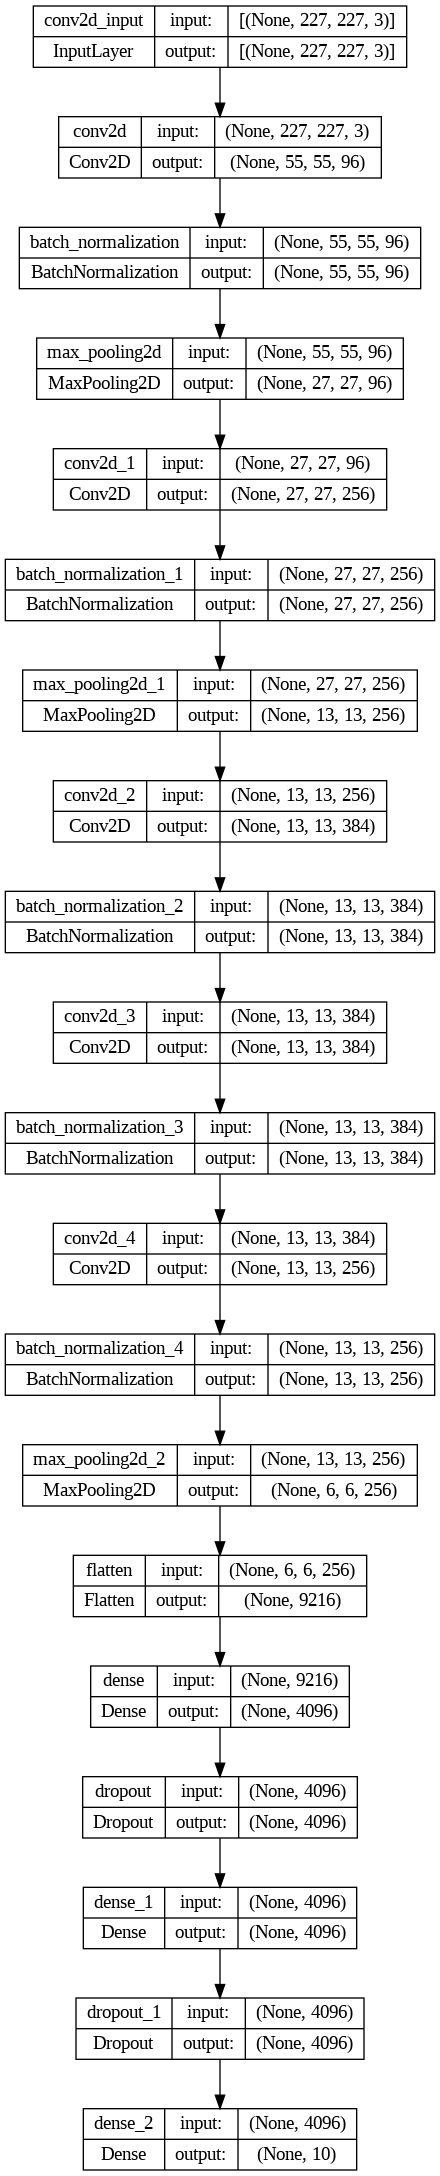

In [ ]:
# Plotting the model architecture

keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

In [ ]:
history = model.fit(train_ds, epochs = 15, validation_data = validation_ds)
history

Epoch 1/15
312/312 [==============================] - 39s 61ms/step - loss: 4.2456 - accuracy: 0.2246 - val_loss: 1.9178 - val_accuracy: 0.3175
Epoch 2/15
312/312 [==============================] - 25s 65ms/step - loss: 2.0905 - accuracy: 0.2863 - val_loss: 1.7992 - val_accuracy: 0.3629
Epoch 3/15
312/312 [==============================] - 26s 67ms/step - loss: 1.9263 - accuracy: 0.3236 - val_loss: 1.7219 - val_accuracy: 0.3619
Epoch 4/15
312/312 [==============================] - 23s 60ms/step - loss: 1.8624 - accuracy: 0.3490 - val_loss: 1.8056 - val_accuracy: 0.3569
Epoch 5/15
312/312 [==============================] - 24s 61ms/step - loss: 1.8178 - accuracy: 0.3630 - val_loss: 1.6593 - val_accuracy: 0.4073
Epoch 6/15
312/312 [==============================] - 24s 62ms/step - loss: 1.7400 - accuracy: 0.3840 - val_loss: 1.5997 - val_accuracy: 0.4214
Epoch 7/15
312/312 [==============================] - 25s 61ms/step - loss: 1.7117 - accuracy: 0.4072 - val_loss: 1.5733 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()